In [1]:
import sys  
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
%matplotlib inline

In [33]:
# folder1 = '../results/000p_r_filter/2'
# folder2 = '../results/000p_r_filter/3'
# folder2 = '../../contrast-phys/results/000p_r_filter/1'

folder1 = '../results/default/1'
folder2 = '../results/default/1'
# folder2 = '../../contrast-phys/joint_results/default/1'

with open(folder1+'/metrics.json') as f:
    metrics1 = json.load(f)

with open(folder2+'/metrics.json') as f:
    metrics2 = json.load(f)
    
with open(folder1+'/config.json') as f:
    config1 = json.load(f)
    
with open(folder2+'/config.json') as f:
    config2 = json.load(f)

    

In [34]:
def es(series, alpha):
    """given a series and alpha, return series of expoentially smoothed points"""
    results = np.zeros_like(series)

    # first value remains the same as series,
    # as there is no history to learn from
    results[0] = series[0] 
    for t in range(1, series.shape[0]):
        results[t] = alpha * series[t] + (1 - alpha) * results[t - 1]

    return results

def get_time(t):
    time_list = []
    for _ in t:
        time_list.append(datetime.strptime(_,"%Y-%m-%dT%H:%M:%S.%f"))
    
    sec_list = []
    for _ in time_list:
        sec_list.append((_-time_list[0]).total_seconds())
    return sec_list

In [35]:
loss_values1 = np.array(metrics1['ipr']['values'])
loss_values2 = np.array(metrics2['ipr']['values'])

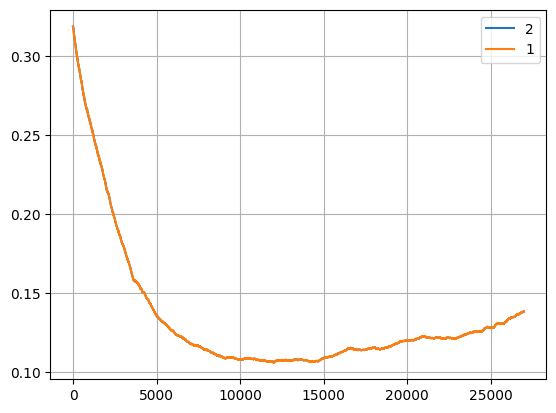

In [36]:
# plt.plot(es(loss_values1, 0.1), label='1')
plt.plot(es(loss_values2, 0.001), label='2')
plt.plot(es(loss_values1, 0.001), label='1')



plt.legend()
# plt.xlim(0, 150000)
# plt.ylim(0,0.1)
# plt.ylim(-1,-0.75)
plt.grid('on')

In [37]:
np.argmin(es(np.array(metrics2['ipr']['values']), 0.001)) / len(metrics2['ipr']['values']) *30 -1

12.343333333333334